<a href="https://colab.research.google.com/github/vyhuynh01/OCR_Project/blob/main/Scene_Text_Recognition_YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Training models**

In [ ]:
from ultralytics import YOLO
import ultralytics

ultralytics.checks()

In [ ]:
pre_trained_model_path = "yolo11m.pt"
yml_path = './datasets/yolo_data\\data.yml'

model = YOLO(pre_trained_model_path)
fine_tuning_results = model.train(
    data=yml_path,
    epochs=100,
    imgsz=640,
    cache=True,
    patience=20,
    plots=True,
)

In [ ]:
model_path = "runs/detect/train/weights/best.pt"

model = YOLO(model_path)
metrics = model.val()

# **II. Testing model**

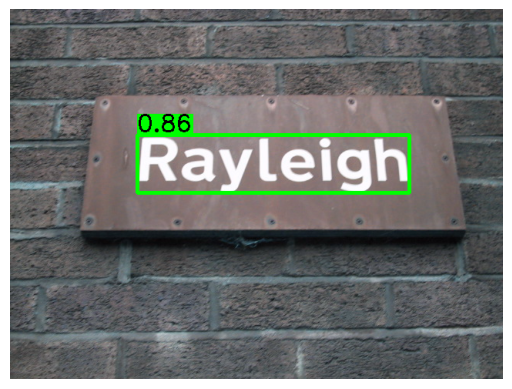

In [ ]:
from ultralytics import YOLO
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


def visualize_bbox(
    img_path, predictions, conf_thres=0.8, font=cv2.FONT_HERSHEY_SIMPLEX
):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    for prediction in predictions:
        conf_score = prediction["confidence"]

        if conf_score < conf_thres:
            continue

        bbox = prediction["box"]
        xmin = int(bbox["x1"])
        ymin = int(bbox["y1"])
        xmax = int(bbox["x2"])
        ymax = int(bbox["y2"])

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

        text = f"{conf_score:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(text, font, 1, 2)

        cv2.rectangle(
            img,
            (xmin, ymin - text_height - 5),
            (xmin + text_width, ymin),
            (0, 255, 0),
            -1,
        )
        cv2.putText(img, text, (xmin, ymin - 5), font, 1, (0, 0, 0), 2)

    return img


model_path = "D:/OCR_Project/models/yolo_v11.pt"
img_path = "D:/OCR_Project/datasets/yolo_data/test/images/IMG_2670.JPG"
conf_thres = 0.75
model = YOLO(model_path)

results = model(img_path, verbose=False)
predictions = json.loads(results[0].to_json())
visualized_img = visualize_bbox(img_path, predictions, conf_thres)

plt.imshow(visualized_img)
plt.axis("off")
plt.show()